## Observations and Insights

* The four most promising Drug regimen Seems to be Capomulin , Ramicane , Propiva and Ceftamin
* From the scatter plot we gather that as the mouse weight increases , the average tumor volume increases as well. 
* The Tumor Volume is for sure to decreasing at progressive timepoints when treated with the Drug Capomulin.
* From the Quartiles and IQR , it can be said that Values below Tumor Volume (mm3) of 3.07 and above 94.04 could be outliers.
* The linear regression analysis has a stunning r value of 95.5% which clearly shows a positive correlation between mouse weight and the average Tumor Volume when treated with the drug Capomulin.


## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "left" ,on = ["Mouse ID"])

# Preview the ombined_data
combined_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

## Summary statistics

In [3]:
#lets find out the duplicate values in the dataframe
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
#locate the duplicate value for elimination
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"]=='g989']

In [5]:
#Store the cleaned dataframe now
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse)==False]

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_stats = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_stats = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_stats = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_stats = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_stats = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean Tumor Vol (mm3)":mean_stats , 
                              "Median Tumor Vol (mm3)": median_stats,
                              "Variance Tumor Vol (mm3)": variance_stats,
                              "Std Tumor Vol (mm3)": std_stats,
                              "Sem Tumor Vol (mm3)" :sem_stats
                              })

summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

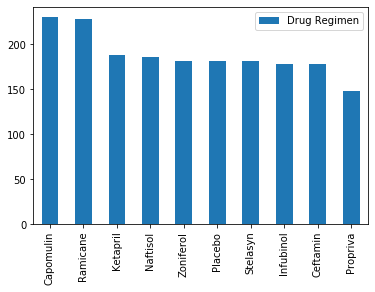

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
fig = clean_data["Drug Regimen"].value_counts()
fig_df = fig.to_frame()
fig_df.plot(kind = 'bar',use_index = True ,y = "Drug Regimen")


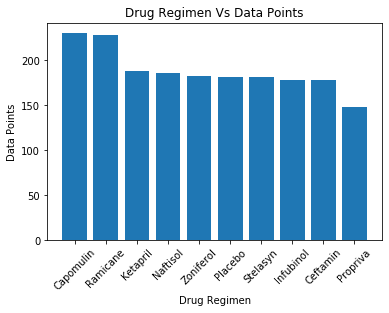

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_groups = clean_data['Drug Regimen'].value_counts()
plt.bar(regimen_groups.index.values,regimen_groups.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Data Points")
plt.title('Drug Regimen Vs Data Points')
plt.show()
plt.tight_layout()

## Pie plots

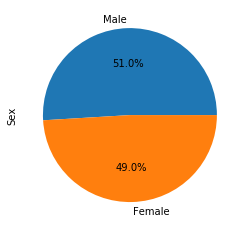

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Get counts of the categories
counts = clean_data.Sex.value_counts() 
counts.plot(kind = 'pie',autopct = '%1.1f%%')
plt.show()



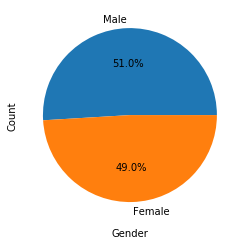

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get counts of the categories
counts = clean_data.Sex.value_counts() 

# Create a bar chart based off of the group series from before
count_chart = counts.plot(kind='pie',autopct = '%1.1f%%')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Gender")
count_chart.set_ylabel("Count")


plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

The lower quartile of Tumor Volume (mm3) is: 37.19
The upper quartile of Tumor Volume (mm3) is: 59.93
The interquartile Tumor Volume (mm3) is: 23.0
The the median of Tumor Volume (mm3) is: 45.0 
Values below Tumor Volume (mm3) of 3.07 could be outliers.
Values above Tumor Volume (mm3) of 94.04 could be outliers.


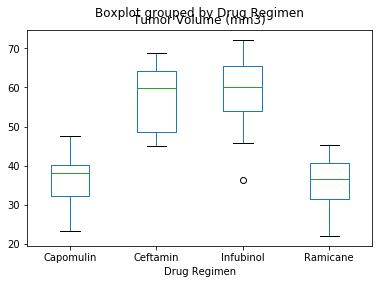

In [46]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Pick each Mouse's Finaltumor volume at their respective last timepoint
groupbyTP = clean_data.groupby("Mouse ID")["Timepoint"].max()
groupbyTP = groupbyTP.reset_index()

# Merge it to the main dataframe
mergeTomain = groupbyTP.merge(clean_data , on = ["Timepoint","Mouse ID"] , how = "left")

# pull values for only four most promising
promising_regimens = mergeTomain.loc[mergeTomain['Drug Regimen'].isin(['Capomulin','Ramicane','Ceftamin','Infubinol'])]

# clean the dataframe of unnecessary columns
tumor_vs_drug = promising_regimens.drop(["Metastatic Sites","Sex","Age_months","Weight (g)"] , axis = 1 )

# sort by the drugs
tumorDrug_df = tumor_vs_drug.sort_values(by = ['Drug Regimen'])

# Determine if there are any potential outliers of Final tumor volume of Mice 
quartiles = tumorDrug_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume (mm3) is: {round(upperq,2)}")
print(f"The interquartile Tumor Volume (mm3) is: {round(iqr)}")
print(f"The the median of Tumor Volume (mm3) is: {round(quartiles[0.5])} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below Tumor Volume (mm3) of {round(lower_bound,2)} could be outliers.")
print(f"Values above Tumor Volume (mm3) of {round(upper_bound,2)} could be outliers.")


#------------------- Check outlier_df to see which Mice were the outliers -------------------------------
outlier_df = tumorDrug_df.loc[(tumorDrug_df['Tumor Volume (mm3)'] < lower_bound) | (tumorDrug_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_df
# -------------------------------------------------------------------------------------------------------

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumorDrug_df.boxplot(by='Drug Regimen',column=['Tumor Volume (mm3)'], grid = False)



## Line and scatter plots

Text(0.5, 1.0, 'Timepoint Vs Tumor Volume')

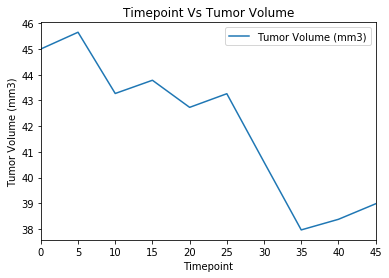

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#select a mouse treated with Capumolin
mouseTpoint = clean_data[clean_data["Mouse ID"]=="b128"]["Timepoint"]
mouseTVol = clean_data[clean_data["Mouse ID"] == "b128"]["Tumor Volume (mm3)"]

#concat above series to a dataframe
mouseTvol_df = pd.concat([mouseTpoint,mouseTVol],axis =1)

#plot for the dataframe indices
mouseTvol_df.plot.line( x = "Timepoint" , y = "Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Timepoint Vs Tumor Volume")


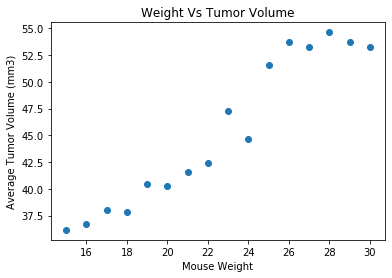

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


# Group by Mouse weight and Its mean tumor volume across all the timepoints
grouped_weight_Tvol = clean_data.groupby('Weight (g)').mean() ["Tumor Volume (mm3)"]

#convert to a dataframe
df = grouped_weight_Tvol.to_frame()

#plot using calling methods on the plt object
plt.scatter(df.index.values,df.values)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs Tumor Volume")
plt.show()
plt.tight_layout()

The r-squared value is: 95.05 %
The Coefficient of Correlation is : 0.9505243961855268


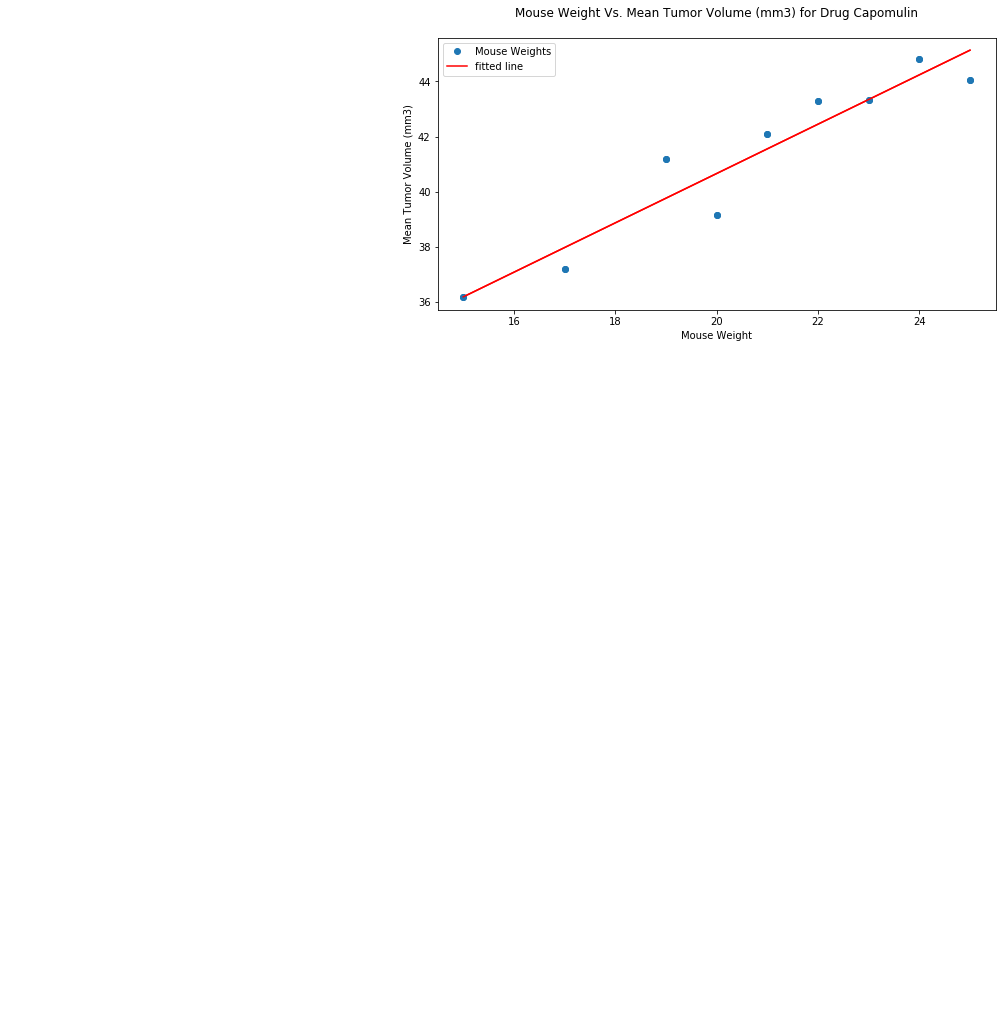

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Group by Mouse weight and Its mean tumor volume for Drug Capomulin
drug_regimen = clean_data[clean_data["Drug Regimen"]=="Capomulin"]

# group by the mouse weight and average the tumor volume
weight_vs_capo = drug_regimen.groupby("Weight (g)").mean() ["Tumor Volume (mm3)"]

#convert to dataframe for easy ref
model_df = weight_vs_capo.to_frame()

#reset index
model_df.reset_index(level=0, inplace=True)

# run methods on the pyplot object to plot the figure 
plt.figure(figsize=(10,5))
plt.tight_layout()

x_values = model_df['Weight (g)']
y_values = model_df['Tumor Volume (mm3)']

#perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# add labels
plt.xlabel('Mouse Weight')
plt.ylabel('Mean Tumor Volume (mm3)')

plt.title('Mouse Weight Vs. Mean Tumor Volume (mm3) for Drug Capomulin\n')
plt.plot(x_values, y_values, 'o', label='Mouse Weights')
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.legend()

print(f"The r-squared value is: {round((rvalue * 100),2)} %")
print(f"The Coefficient of Correlation is : {rvalue}")
plt.show()


